In [1]:
pip install category_encoders

     -------------------------------------- 81.9/81.9 kB 651.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
import category_encoders as ce
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
data=pd.read_csv("C:/Users/rohan/Downloads/Company_Data.csv")
data.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

<Figure size 1500x800 with 0 Axes>

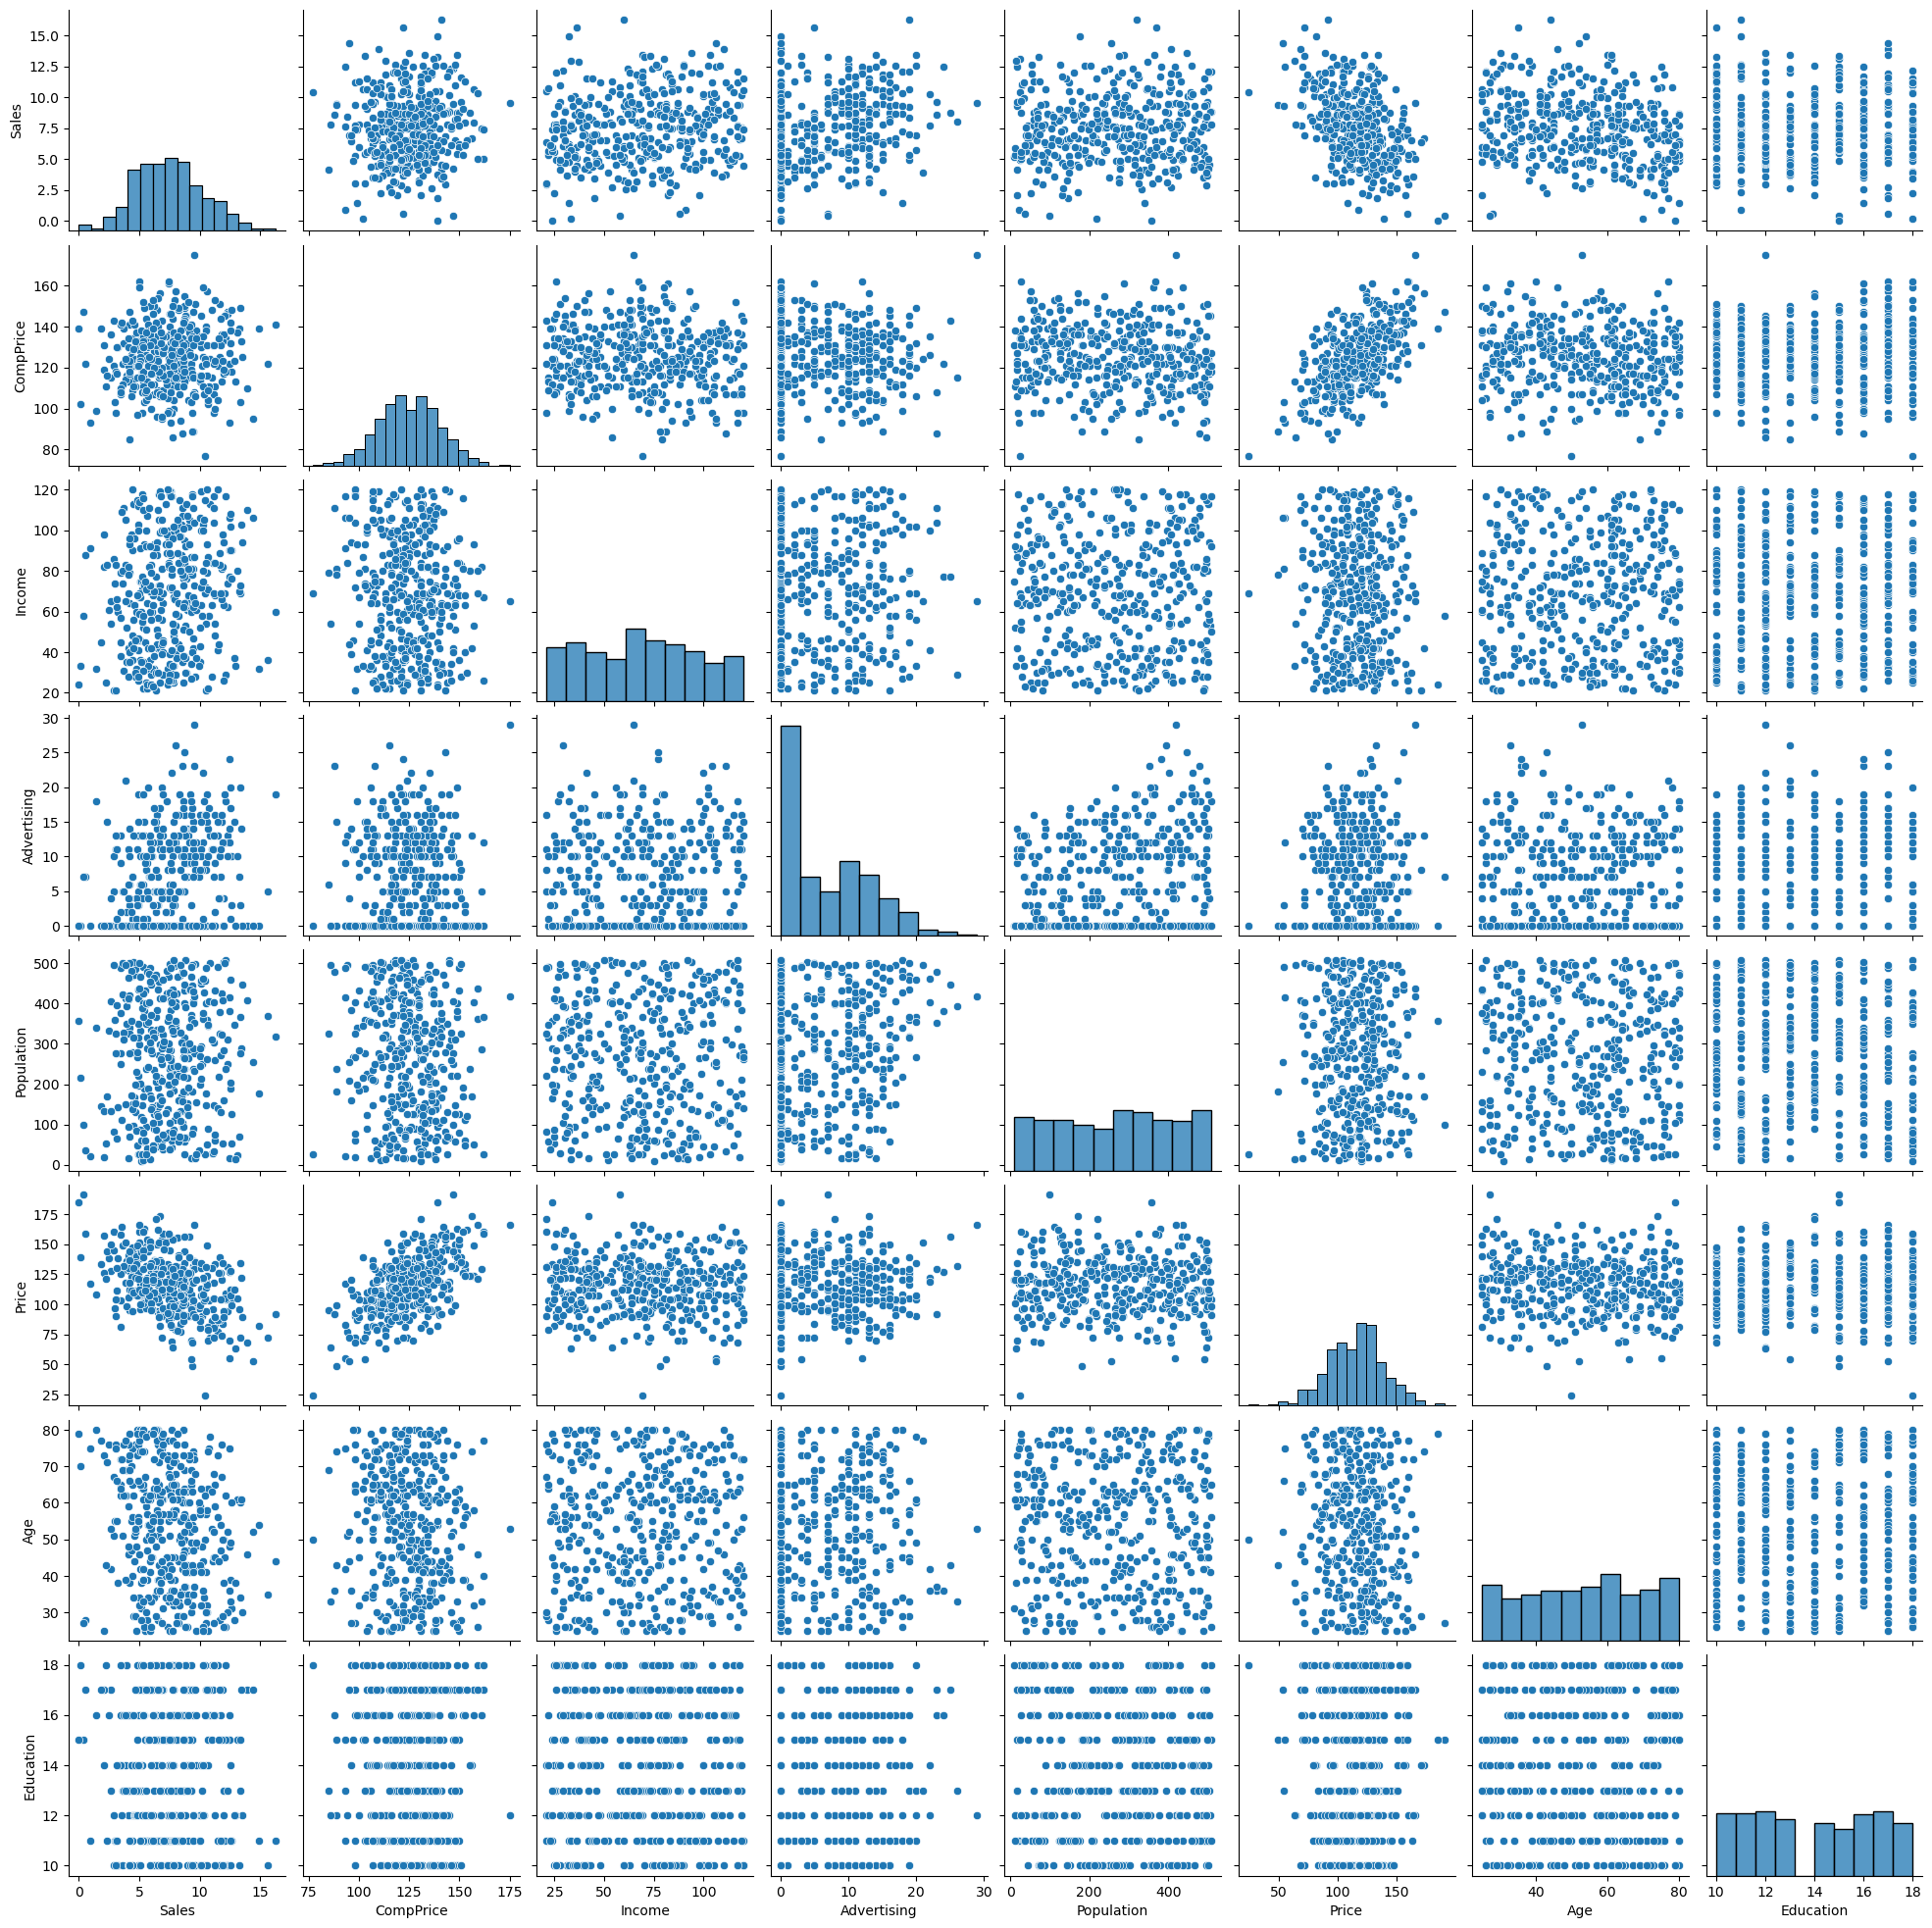

In [5]:
plt.figure(figsize=(15,8))
sns.pairplot(data)
plt.show()

In [6]:
data.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [7]:
data.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [8]:
#EDA
encoder = ce.OrdinalEncoder(cols=["ShelveLoc", "Urban", "US"])
sales = encoder.fit_transform(data)

In [9]:
sale_val = []
for value in data['Sales']:
    if value <= 7.49:
        sale_val.append("low")
    else:
        sale_val.append("high")
        
sales["sale_val"]= sale_val

In [10]:
sales.head()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0   9.50        138      73           11         276    120          1   42   
1  11.22        111      48           16         260     83          2   65   
2  10.06        113      35           10         269     80          3   59   
3   7.40        117     100            4         466     97          3   55   
4   4.15        141      64            3         340    128          1   38   

   Education  Urban  US sale_val  
0         17      1   1     high  
1         10      1   1     high  
2         12      1   1     high  
3         14      1   1      low  
4         13      1   2      low

In [11]:
#Train test and split
x = sales.drop(['sale_val', 'Sales'],axis=1)
y = sales['sale_val']
x

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120          1   42   
1          111      48           16         260     83          2   65   
2          113      35           10         269     80          3   59   
3          117     100            4         466     97          3   55   
4          141      64            3         340    128          1   38   
..         ...     ...          ...         ...    ...        ...  ...   
395        138     108           17         203    128          2   33   
396        139      23            3          37    120          3   55   
397        162      26           12         368    159          3   40   
398        100      79            7         284     95          1   50   
399        134      37            0          27    120          2   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  
3           14      1   1  
4           13      1   2  
..         ...    ...  ..  
395         14      1   1  
396         11      2   1  
397         18      1   1  
398         12      1   1  
399         16      1   1  

[400 rows x 10 columns]

In [12]:
y

0      high
1      high
2      high
3       low
4       low
       ... 
395    high
396     low
397     low
398     low
399    high
Name: sale_val, Length: 400, dtype: object

In [13]:
num_trees = 100
max_features = 4
kfold = KFold(n_splits=20 ,shuffle=True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean()*100)

80.74999999999999


In [14]:
#Let's try if we can increase the cv score using ensemble techniques
#Bagging
# Bagged Decision Trees for Classification
from sklearn.ensemble import BaggingClassifier
seed = 7
kfold = KFold(n_splits=20, random_state=seed,shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 100
model1 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results_bag = cross_val_score(model1, x, y, cv=kfold)
print(results_bag.mean()*100)

81.0


In [15]:
from sklearn.ensemble import AdaBoostClassifier

num_trees = 10
seed=7
kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
model2 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results_boost = cross_val_score(model2, x, y, cv=kfold)
print(results_boost.mean()*100)

76.5


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [17]:
# create the sub models
estimators = []
model3 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model3))
model4 = DecisionTreeClassifier()
estimators.append(('cart', model4))
model5 = SVC()
estimators.append(('svm', model5))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results_stack = cross_val_score(ensemble, x, y, cv=kfold)
print(results_stack.mean()*100)

77.49999999999999
